In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('../data/cleaned/resale_price_normalized.csv')
df.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'remaining_lease', 'resale_price', 'lat', 'lon', 'nearest_mrt_distance',
       'nearest_bus_distance', 'education_score', 'shopping_score',
       'food_score', 'recreation_score', 'healthcare_score',
       'CPI (base 2024-12)', 'inflation_rate (x100)', 'building_age_2025',
       'total_unemployment_rate', 'resident_unemployment_rate',
       'interest_rate', 'fx_rate', 'avg_household_income', 'NoReligion',
       'Buddhism', 'Taoism1', 'Islam', 'Hinduism', 'Sikhism',
       'Christianity_Catholic', 'Christianity_OtherChristians',
       'OtherReligions', 'Chinese', 'Malays', 'Indians', 'Others', 'year',
       'priv_prop', 'month_num'],
      dtype='object')

In [7]:
df.drop(columns = ['floor_area_sqm', 'flat_model', 'CPI (base 2024-12)', 'building_age_2025', 'total_unemployment_rate', 'fx_rate',
                   'Chinese', 'Malays', 'Indians', 'Others'], inplace = True)

## Prepatory

In [8]:
df.dropna(subset = ['resale_price'], inplace = True)
X = df.drop(columns=['resale_price'])
y = df['resale_price']

In [9]:
df

,town,flat_type,storey_range,remaining_lease,resale_price,lat,lon,nearest_mrt_distance,nearest_bus_distance,education_score,...,Taoism1,Islam,Hinduism,Sikhism,Christianity_Catholic,Christianity_OtherChristians,OtherReligions,year,priv_prop,month_num
0,BUKIT MERAH,0.333333,0.2500,0.301953,0.131278,0.000000,0.456109,0.159033,0.226134,0.197110,...,0.099623,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.0,0.583962,0.181818
1,BUKIT MERAH,0.333333,0.1250,0.299138,0.131197,0.000000,0.456109,0.159033,0.226134,0.197110,...,0.099623,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.0,0.615417,0.363636
2,BUKIT MERAH,0.333333,0.0625,0.301953,0.127206,0.002888,0.454289,0.170487,0.124639,0.214251,...,0.099623,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.0,0.583962,0.181818
3,BUKIT MERAH,0.333333,0.1875,0.288756,0.171393,0.002888,0.454289,0.170487,0.124639,0.214251,...,0.099623,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.0,0.592284,1.000000
4,BUKIT MERAH,0.333333,0.1250,0.300545,0.190853,0.005513,0.415298,0.035276,0.242965,0.144639,...,0.099623,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.0,0.583962,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196981,SEMBAWANG,0.666667,0.0625,0.658279,0.263095,1.000000,0.429908,0.288495,0.270891,0.382806,...,0.084274,0.176598,0.053553,0.002490,0.054746,0.094928,0.002661,1.0,0.353128,0.272727
196982,SEMBAWANG,0.666667,0.1250,0.653880,0.277557,1.000000,0.429908,0.288495,0.270891,0.382806,...,0.084274,0.176598,0.053553,0.002490,0.054746,0.094928,0.002661,1.0,0.686015,0.545455
196983,SEMBAWANG,0.500000,0.2500,0.652472,0.240401,1.000000,0.429908,0.288495,0.270891,0.382806,...,0.084274,0.176598,0.053553,0.002490,0.054746,0.094928,0.002661,1.0,0.686015,0.636364
196984,SEMBAWANG,0.666667,0.2500,0.649481,0.329079,1.000000,0.429908,0.288495,0.270891,0.382806,...,0.084274,0.176598,0.053553,0.002490,0.054746,0.094928,0.002661,1.0,0.519712,0.818182


In [10]:
df.columns

Index(['town', 'flat_type', 'storey_range', 'remaining_lease', 'resale_price',
       'lat', 'lon', 'nearest_mrt_distance', 'nearest_bus_distance',
       'education_score', 'shopping_score', 'food_score', 'recreation_score',
       'healthcare_score', 'inflation_rate (x100)',
       'resident_unemployment_rate', 'interest_rate', 'avg_household_income',
       'NoReligion', 'Buddhism', 'Taoism1', 'Islam', 'Hinduism', 'Sikhism',
       'Christianity_Catholic', 'Christianity_OtherChristians',
       'OtherReligions', 'year', 'priv_prop', 'month_num'],
      dtype='object')

In [11]:
categorical_features = ['town']
numerical_features = [
    'storey_range', 'flat_type', 'remaining_lease',
    'lat', 'lon', 'nearest_mrt_distance', 'nearest_bus_distance',
    'education_score', 'shopping_score', 'food_score', 'recreation_score',
    'healthcare_score', 'inflation_rate (x100)',
    'resident_unemployment_rate',
    'interest_rate', 'avg_household_income', 'priv_prop'
]
numerical_features.extend(['year', 'month_num'])

In [12]:
demographic_features = [
    'NoReligion', 'Buddhism', 'Taoism1', 'Islam', 'Hinduism', 'Sikhism',
    'Christianity_Catholic', 'Christianity_OtherChristians', 'OtherReligions'
]
numerical_features.extend(demographic_features)  # Add to numerical pipeline

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest Regressor

In [15]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['storey_range', 'flat_type',
                                                   'remaining_lease', 'lat',
                                                   'lon',
                                                   'nearest_mrt_distance',
                                                   'nearest_bus_distance',
                                                   'education_score',
                                                   'shopping_score',
                                                   'food_score',
                                                   'recreation_score',
                                                   'healthcare_score',
                                                   'inflation_rate (x100)',
                                                   'resident_unemployment_rate',
                                                   'interest_rate',
                                                   'avg_household_income',
                                                   'priv_prop', 'year',
                                                   'month_num', 'NoReligion',
                                                   'Buddhism', 'Taoism1',
                                                   'Islam', 'Hinduism',
                                                   'Sikhism',
                                                   'Christianity_Catholic',
                                                   'Christianity_OtherChristians',
                                                   'OtherReligions']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['town'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Save the random forest model if you want to us it later
#import joblib
#joblib.dump(model, 'random_forest_pipeline.pkl')

['random_forest_pipeline.pkl']

In [16]:
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.016147107538160392
Mean Squared Error: 0.0005313065816923348
R² Score: 0.9678572489493613


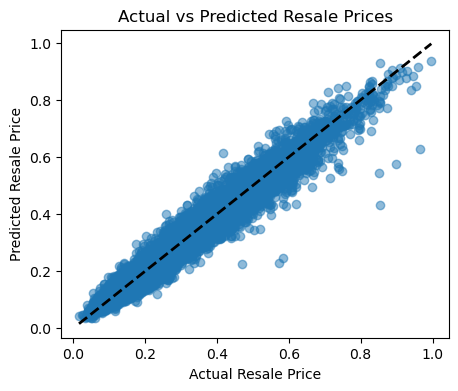

In [17]:
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()

## XGBoost

In [18]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# Define your pipeline
xg = Pipeline(steps=[
    ('preprocessor', preprocessor),  # optional: OneHotEncoder, StandardScaler, etc.
    ('regressor', XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        objective='reg:squarederror'  # important for regression tasks
    ))
])

# Fit the model
xg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['storey_range', 'flat_type',
                                                   'remaining_lease', 'lat',
                                                   'lon',
                                                   'nearest_mrt_distance',
                                                   'nearest_bus_distance',
                                                   'education_score',
                                                   'shopping_score',
                                                   'food_score',
                                                   'recreation_score',
                                                   'healthcare_score',
                                                   'inflation_rate (x100)',
                                                   'resident_unemployment_rate',
                                                   'interest_rate',
                                                   'avg...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [19]:
y_predxg = xg.predict(X_test)

# Evaluation Metrics
maexg = mean_absolute_error(y_test, y_predxg)
msexg = mean_squared_error(y_test, y_predxg)
r2xg = r2_score(y_test, y_predxg)

print(f"Mean Absolute Error: {maexg}")
print(f"Mean Squared Error: {msexg}")
print(f"R² Score: {r2xg}")

Mean Absolute Error: 0.027976388186482744
Mean Squared Error: 0.0015200035018311387
R² Score: 0.908043499103971


## SVM

Mean Absolute Error: 0.03291724687109121
Mean Squared Error: 0.0017106268734374671
R² Score: 0.8965112505132248


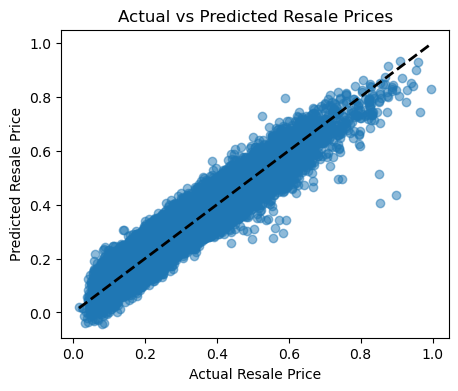

In [20]:
from sklearn import svm
#regr = svm.SVR()
#regr.fit(X_train, y_train)
# Define the preprocessor

# Create a pipeline with the preprocessor and the SVR model
model_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', svm.SVR())
])

# Fit the model
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)

# Evaluation Metrics
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"Mean Absolute Error: {mae_svm}")
print(f"Mean Squared Error: {mse_svm}")
print(f"R² Score: {r2_svm}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_svm, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()

## Decision Tree

Mean Absolute Error: 0.022641910657036857
Mean Squared Error: 0.0010659492260342081
R² Score: 0.9355126742531508


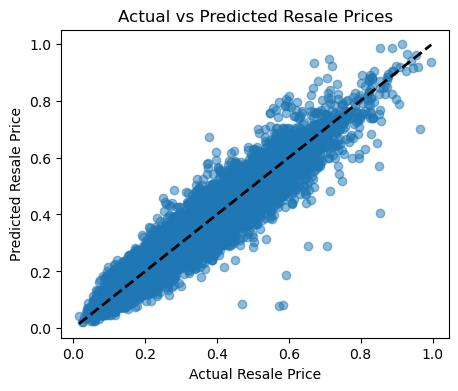

In [21]:
from sklearn import tree

model_dtree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', tree.DecisionTreeRegressor())
])


model_dtree.fit(X_train, y_train)

y_pred_dtree = model_dtree.predict(X_test)

# Evaluation Metrics
mae_dtree = mean_absolute_error(y_test, y_pred_dtree)
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
r2_dtree = r2_score(y_test, y_pred_dtree)

print(f"Mean Absolute Error: {mae_dtree}")
print(f"Mean Squared Error: {mse_dtree}")
print(f"R² Score: {r2_dtree}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_dtree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()



## SGD Regressor

Mean Absolute Error: 0.0382561938175354
Mean Squared Error: 0.0026398333141360317
R² Score: 0.8402965294328084


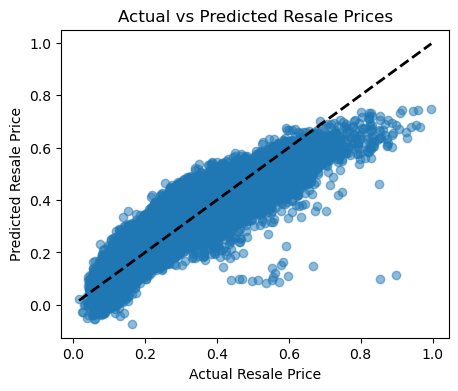

In [22]:
from sklearn.linear_model import SGDRegressor

model_sgd = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor())
])


model_sgd.fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

# Evaluation Metrics
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"Mean Absolute Error: {mae_sgd}")
print(f"Mean Squared Error: {mse_sgd}")
print(f"R² Score: {r2_sgd}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_sgd, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()



## PLS Regression

Mean Absolute Error: 0.05058773734313799
Mean Squared Error: 0.004479224035370322
R² Score: 0.7290178815207727


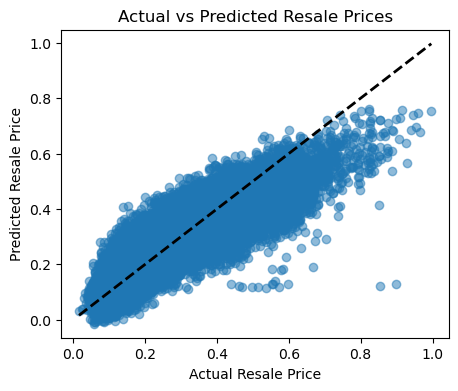

In [23]:
from sklearn.cross_decomposition import PLSRegression


model_PLSR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', PLSRegression(n_components=2))
])


model_PLSR.fit(X_train, y_train)

y_pred_PLSR = model_PLSR.predict(X_test)

# Evaluation Metrics
mae_PLSR = mean_absolute_error(y_test, y_pred_PLSR)
mse_PLSR = mean_squared_error(y_test, y_pred_PLSR)
r2_PLSR = r2_score(y_test, y_pred_PLSR)

print(f"Mean Absolute Error: {mae_PLSR}")
print(f"Mean Squared Error: {mse_PLSR}")
print(f"R² Score: {r2_PLSR}")
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_PLSR, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()

## CatBoost

In [26]:
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

# Build the pipeline
cat = Pipeline(steps=[
    ('preprocessor', preprocessor),  # your ColumnTransformer with OneHotEncoder
    ('regressor', CatBoostRegressor(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        loss_function='RMSE',
        verbose=100,
        random_state=42
    ))
])

# Fit the model
cat.fit(X_train, y_train)

# Predict
y_pred_cat = cat.predict(X_test)



0:	learn: 0.1199555	total: 65.1ms	remaining: 32.5s
100:	learn: 0.0340920	total: 871ms	remaining: 3.44s
200:	learn: 0.0293568	total: 1.74s	remaining: 2.58s
300:	learn: 0.0270924	total: 2.53s	remaining: 1.67s
400:	learn: 0.0257682	total: 3.31s	remaining: 816ms
499:	learn: 0.0248017	total: 4.08s	remaining: 0us


In [27]:
# Evaluation Metrics
mae_cat = mean_absolute_error(y_test, y_pred_cat)
mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)

In [28]:
print(f"Mean Absolute Error: {mae_cat}")
print(f"Mean Squared Error: {mse_cat}")
print(f"R² Score: {r2_cat}")

Mean Absolute Error: 0.01818098074470272
Mean Squared Error: 0.0006359761514930744
R² Score: 0.9615249955186466


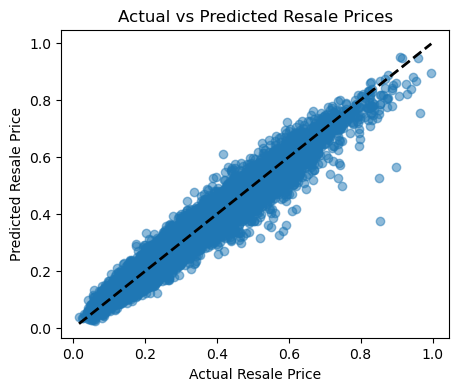

In [29]:
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred_cat, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Resale Price')
plt.ylabel('Predicted Resale Price')
plt.title('Actual vs Predicted Resale Prices')
plt.show()
